## INTERN: AVISHEK DASGUPTA


## Prediction Using Supervised Machine Learning

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Reading data from the given data set

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
Data = pd.read_csv(url)


### Data Overview

In [3]:
Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Let's plot our data points on a graph to check whether there is any relationship between the data.



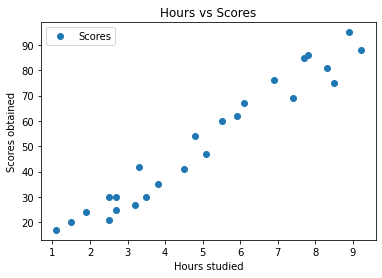

In [4]:
Data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.show()

### So,from the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the Data: Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = Data.iloc[:, :-1].values
Y = Data.iloc[:, 1].values

### Now we will split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

### Plotting the regression line

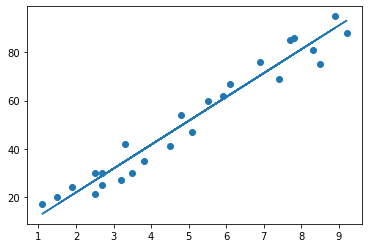

In [10]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()


### Making Predictions

In [13]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted

In [14]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:

own_pred = regressor.predict([[9.25]])
own_pred



array([93.69173249])

#### If a student studies for 9.25 hrs/day, the predicted score will be 93.6917.

### Model Evaluation


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))


Mean Absolute Error: 4.183859899002975


In [26]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(Y_test, Y_pred))

R2 Score: 0.9454906892105356


### So, after evaluating the model, we find that mean absolute error is 4.18385 and accuracy of the model is 94.54%